In [1]:
import pandas as pd
from datetime import datetime
import ipywidgets as widgets
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import clear_output

import os # anaconda has a known error with basemap. See here: 
          # https://ctcoding.wordpress.com/2019/01/29/solved-proj_lib-error-when-installing-basemap-on-windows-using-anaconda/
os.environ['PROJ_LIB'] = 'C:/Users/Josep/Anaconda3/Lib/site-packages/mpl_toolkits/basemap/'
from mpl_toolkits.basemap import Basemap

import sys # the basemap visualisation raises future warnings from matplotlib
import warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# original files are too big to upload to github, so I've merged and stripped them

# df = pd.read_csv('300k.csv', usecols = ['pokemonId', 'latitude', 'longitude', 'appearedLocalTime', 'weather'])

# df['appearedLocalTime'] = df['appearedLocalTime'].str.replace("T"," ")
# df['appearedLocalTime'] = df['appearedLocalTime'].str.replace("-",":")
# df['appearedLocalTime'] = pd.to_datetime(df['appearedLocalTime'], format = "%Y:%m:%d %H:%M:%S")

# names = pd.read_csv('id_name_lookup.csv', index_col = 'id') # join on pokemon name to pokedex id
# data = df.merge(names, how = 'left', left_on = 'pokemonId', right_index = True)

# data = data[['name','pokemonId','latitude','longitude','appearedLocalTime','weather']]

# data.to_csv('data.csv', index = False)

In [3]:
data = pd.read_csv('data.csv')

In [4]:
def show_vis(df):
    plt.figure(1, figsize=(20,15))
    m1 = Basemap(projection='merc', # standard world map format
                 llcrnrlat=-60, # latitude coordinates for lower-left map corner
                 urcrnrlat=65, # same for upper-right
                 llcrnrlon=-180, # same for longitude
                 urcrnrlon=180,
                 resolution='c') # c = 'crude' - lower resolution means faster to draw

    m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
    m1.drawmapboundary(fill_color='#000000')                # black background
    m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

    # Plot the data
    x, y = m1(df.longitude.tolist(),df.latitude.tolist())
    m1.scatter(x,y, s=3, c="#1292db", lw=0, alpha=1, zorder=5)
    plt.title("Pokemon activity")
    plt.show()

Dropdown(description='SELECT', index=10, options=('Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Beed…

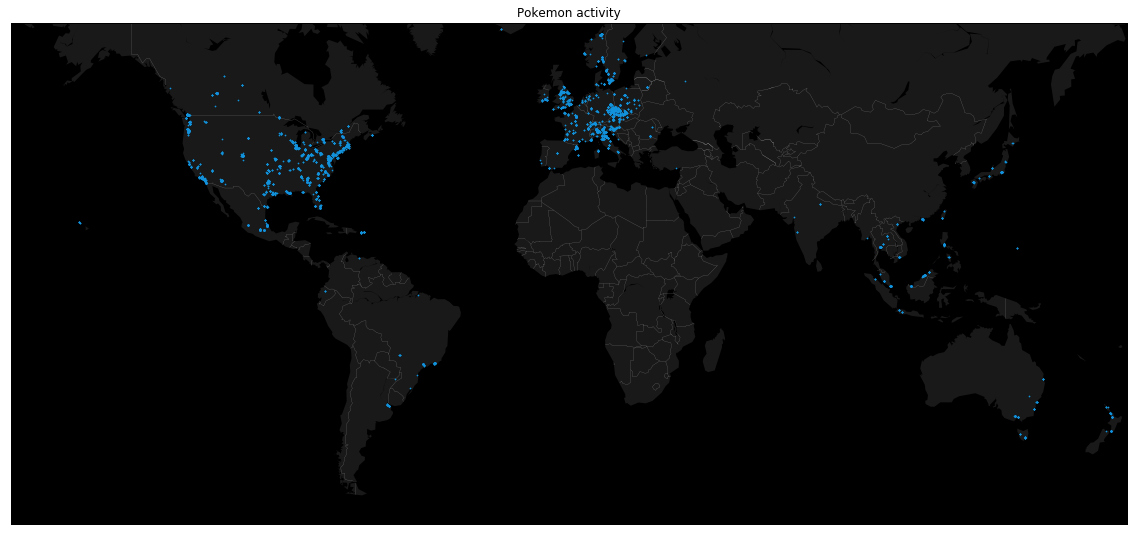

In [5]:
dropdown = widgets.Dropdown(options = sorted(data['name'].unique()), # defines what the dropdown looks like
                            value = sorted(data['name'].unique())[0], # first item alphabetically is the default value
                            disabled = False,
                            description = 'SELECT')

def on_change(change): 
    if change['name'] == 'value': # change is a list of dictionaries. we're only interested in one

        clear_output() # wipe the old graph (this also unavoidably wipes the dropdown)
        df = data[data['name'] == change['new']].copy() # subset dataframe by whatever pokemon is now selected
        display(dropdown) # re-show dropdown
        show_vis(df)
        
dropdown.observe(on_change) # .observe() is essentially a listener - it automatically calls on_change if the dropdown is changed
                            # and passes it a list of dictionaries
display(dropdown)